In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
%matplotlib inline

## How should we approach this? Any ideas?

### Let's compute the HP and BHP for the first vendor, for 1 day
- to get an idea of how the calculation works.

### If that works, we can just randomly select the vendor according to probabilities

### Make 1e6 replications

In [4]:
vendors = [0,1,2,3]

In [5]:
density = [900,680, 1000, 775]

### Sampling the Pump Efficiency

"Pump efficiency is Uniformly Distributed between 75% and 80%"



In [8]:
np.random.uniform(high=80, low=75)

75.59949210584722

In [9]:
p_eff = np.random.uniform(high=80, low=75)

In [11]:
rho = density[0]

In [12]:
head_loss = 25.51 # Given to us
g = 9.8 #m/s^2
mass_flow_rate = rho * 0.09457
power = mass_flow_rate * head_loss * g #in watts
horsepower = power  * 0.00134102
bhp = horsepower / p_eff



In [13]:
bhp

0.36046220931340056

# Let's make these calculations into a 'function'

## Why are we doing this?

In [14]:
def calc_bhp(vendor, p_eff):
    
    rho = density[vendor]
    
    head_loss = 25.51 # Given to us
    g = 9.8 #m/s^2
    mass_flow_rate = rho * 0.09457
    power = mass_flow_rate * head_loss * g #in watts
    horsepower = power  * 0.00134102
    bhp = horsepower / p_eff
    
    return bhp

In [26]:
p_eff = np.random.uniform(high=80, low=75)
calc_bhp(0, p_eff)


0.3719994649000716

# One thing that is left to do:

Select a vendor according to the given probabilites.

Tip: Use np.random.choice!

In [41]:
selected_vendors = np.random.choice([0,1,2,3], size=100, p=[0.6,0.2,0.1,0.1], replace=True)

In [63]:
sim_results = []
sim_eff = []
for ven in selected_vendors:
    p_eff = np.random.uniform(high=80, low=75)
    bhp = calc_bhp(ven, p_eff)
    sim_results.append(bhp)
    sim_eff.append(p_eff)

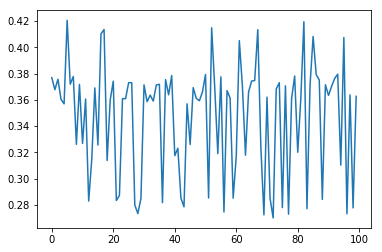

In [64]:
plt.plot(sim_results)

## This plot is difficult to understand. Let's store the results in a pd DataFrame


In [65]:
results_df = pd.DataFrame({'Vendor':selected_vendors, 'BHP':sim_results, 'Efficiency':sim_eff })
results_df

,BHP,Efficiency,Vendor
0,0.376880,75.711890,0
1,0.367705,77.601216,0
2,0.375672,75.955513,0
3,0.360355,79.183896,0
4,0.356957,79.937824,0
5,0.420562,75.386728,2
6,0.371879,76.730211,0
7,0.377759,75.535788,0
8,0.326153,75.336468,3
9,0.371726,76.761824,0


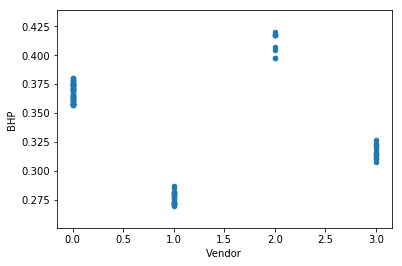

In [58]:
results_df.plot.scatter(x='Vendor', y='BHP')

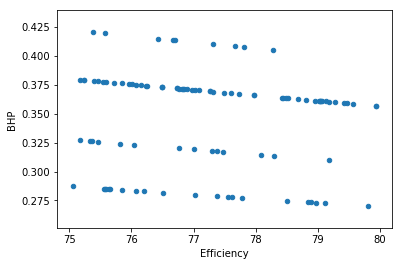

In [67]:
results_df.plot.scatter(x='Efficiency', y='BHP')

#What is this plot telling us?

# Histogram of BHP (Distribution)

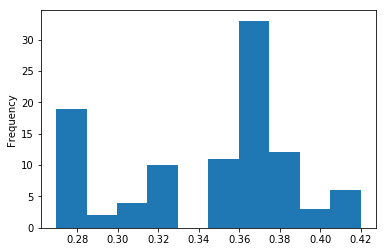

In [61]:
results_df['BHP'].plot.hist()

# What is the mean BHP?

In [62]:
results_df['BHP'].mean()

0.34533663897422284

# Part 2

## The Company buys a Pump with fixed efficiency of 85%

### What is the benefit?

# Let's re-run the simulation with the new pump

In [68]:
sim_results2 = []
#sim_eff = []
for ven in selected_vendors:
#    p_eff = np.random.uniform(high=80, low=75)
    bhp = calc_bhp(ven, 85)
    sim_results2.append(bhp)
    #sim_eff.append(p_eff)

In [74]:
avg  = sum(sim_results)/float(len(sim_results))
avg2 = sum(sim_results2)/float(len(sim_results2))
print(avg, avg2)

0.34712367100234026 0.31529502750613014


# When is buying the new pump worth it?

# If the cost of the new pump is less than the extra cost (over the expected lifetime of the new pump) the company should invest in the new pump.